#**Install Requirement Library**

In [1]:
!pip install anytree
!pip install basemap
!pip install mycolorpy
!pip install matplotlib basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3851 sha256=0876852e255d5941ef3f868e1a00d416188f2c1f3cba9e410a547e247700ce39
  Stored in directory: /root/.cache/pip/wheels/d6/1d/04/f8bfb8b04e3daba330b3f377c041b89304271ff98fb6704946
Successfully built mycolorpy


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import graphviz
import math
import seaborn as sns

from datetime import datetime
from matplotlib import pyplot as plt
from IPython.display import Image
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from datetime import timedelta
from scipy import optimize
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import timedelta, datetime
from mycolorpy import colorlist as mcp

%matplotlib inline

#**Read Dataset**

In [24]:
dataset1 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_1.csv"
dataset2 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_2.csv"
dataset3 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_3.csv"
dataset4 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_4.csv"
dataset5 = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/Indonesia/Indonesia_EQ_Part_5.csv"

# Load each dataset
df1 = pd.read_csv(dataset1)
df2 = pd.read_csv(dataset2)
df3 = pd.read_csv(dataset3)
df4 = pd.read_csv(dataset4)
df5 = pd.read_csv(dataset5)

# Concatenate the datasets
merged_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Display the merged DataFrame
merged_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1994-12-31T11:05:59.870Z,2.475,126.188,86.8,5.2,mb,NaN,NaN,NaN,0.7,...,2014-11-07T00:57:00.923Z,"173 km NE of Laikit, Laikit II (Dimembe), Indo...",earthquake,NaN,8.6,NaN,16.0,reviewed,us,us
1,1994-12-30T21:28:48.450Z,-5.092,103.514,99.0,5.1,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:57:00.847Z,"121 km SSE of Pagar Alam, Indonesia",earthquake,NaN,21.7,NaN,19.0,reviewed,us,us
2,1994-12-30T03:46:35.310Z,-9.697,124.116,78.5,4.8,mb,NaN,NaN,NaN,1.3,...,2014-11-07T00:57:00.717Z,"25 km NW of Soe, Indonesia",earthquake,NaN,21.7,NaN,4.0,reviewed,us,us
3,1994-12-29T06:15:10.280Z,-8.608,119.387,142.2,4.2,mb,NaN,NaN,NaN,1.4,...,2014-11-07T00:57:00.590Z,"11 km W of Komodo, Indonesia",earthquake,NaN,15.8,NaN,2.0,reviewed,us,us
4,1994-12-29T04:33:53.090Z,-5.112,102.689,60.7,5.4,mb,NaN,NaN,NaN,0.9,...,2022-04-28T17:19:32.470Z,"135 km SSW of Pagar Alam, Indonesia",earthquake,NaN,11.7,NaN,30.0,reviewed,us,us


In [25]:
data_gempa = merged_df
# Mengubah kolom "time" menjadi tipe data datetime
data_gempa['time'] = pd.to_datetime(data_gempa['time'])

# Memisahkan kolom "time" menjadi dua kolom terpisah: "date" dan "time"
data_gempa['date'] = data_gempa['time'].dt.date
data_gempa['time'] = data_gempa['time'].dt.time

# Mengonversi kolom "time" menjadi string dengan format HH:MM:SS
data_gempa['time'] = data_gempa['time'].apply(lambda x: x.strftime('%H:%M:%S'))

selected_columns = ['time','date', 'latitude', 'longitude', 'place' ,'depth', 'mag', 'magType', 'type']
data_gempa = data_gempa.loc[:, selected_columns]

# Menampilkan lima baris pertama setelah pemisahan
data_gempa.head(5)

,time,date,latitude,longitude,place,depth,mag,magType,type
0,11:05:59,1994-12-31,2.475,126.188,"173 km NE of Laikit, Laikit II (Dimembe), Indo...",86.8,5.2,mb,earthquake
1,21:28:48,1994-12-30,-5.092,103.514,"121 km SSE of Pagar Alam, Indonesia",99.0,5.1,mb,earthquake
2,03:46:35,1994-12-30,-9.697,124.116,"25 km NW of Soe, Indonesia",78.5,4.8,mb,earthquake
3,06:15:10,1994-12-29,-8.608,119.387,"11 km W of Komodo, Indonesia",142.2,4.2,mb,earthquake
4,04:33:53,1994-12-29,-5.112,102.689,"135 km SSW of Pagar Alam, Indonesia",60.7,5.4,mb,earthquake


#**Feature Description**

In [26]:
data_gempa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       68783 non-null  object 
 1   date       68783 non-null  object 
 2   latitude   68783 non-null  float64
 3   longitude  68783 non-null  float64
 4   place      68783 non-null  object 
 5   depth      68783 non-null  float64
 6   mag        68783 non-null  float64
 7   magType    68783 non-null  object 
 8   type       68783 non-null  object 
dtypes: float64(4), object(5)
memory usage: 4.7+ MB


# **Univariate analysis**

<ipython-input-27-a7ed5b28579e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


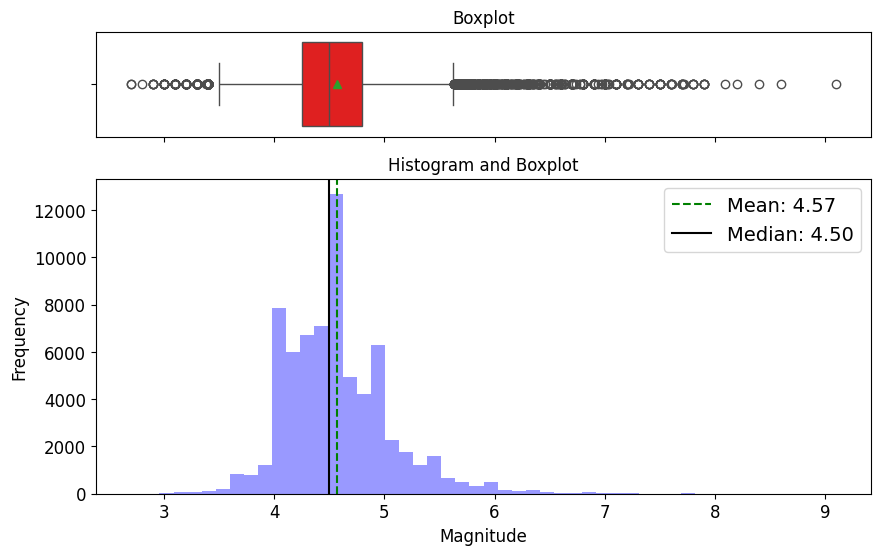

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def hist_box(mycol):
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 6))

    sns.boxplot(mycol, ax=ax_box, showmeans=True, color='red', orient='h')
    sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')

    mean_val = np.mean(mycol)
    median_val = np.median(mycol)

    ax_hist.axvline(mean_val, color='g', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='black', linestyle='-', label=f'Median: {median_val:.2f}')

    ax_hist.legend()

    ax_box.set(ylabel='')
    ax_hist.set(title='Histogram and Boxplot', xlabel='Magnitude', ylabel='Frequency')
    ax_box.set_title('Boxplot', fontsize=12)

    plt.show()

# Apply the function to the earthquake magnitude data
hist_box(data_gempa.mag)

<ipython-input-27-a7ed5b28579e>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mycol, kde=False, ax=ax_hist, color='blue')


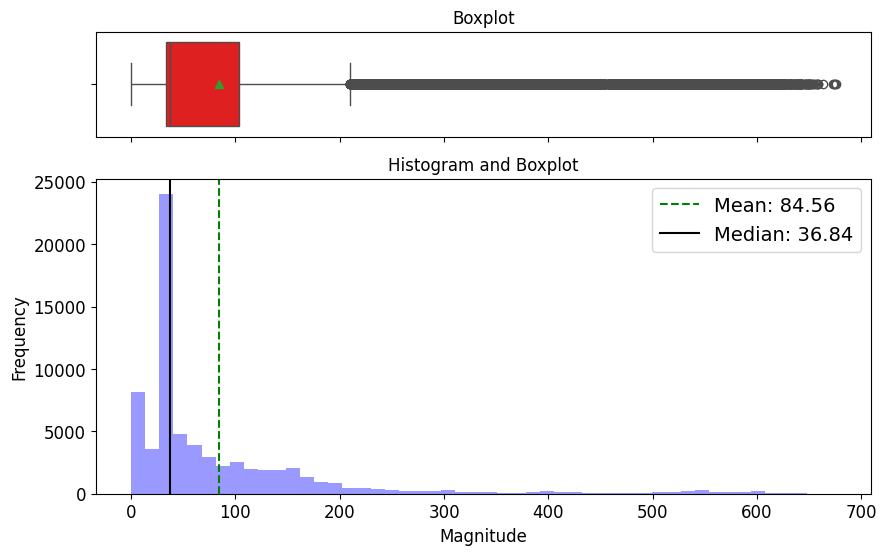

In [28]:
hist_box(data_gempa.depth)

# **Categorical variables**

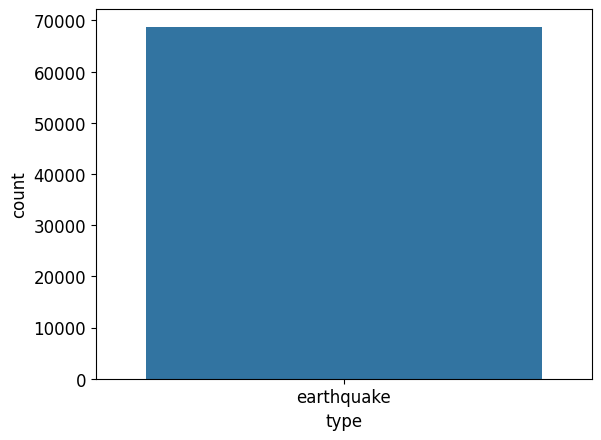

In [29]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='type', data=data_gempa)
plt.show()

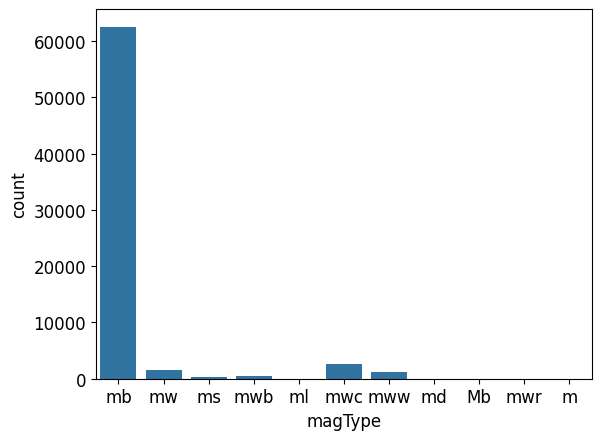

In [30]:
# use countplot to plot number of units sold by model of treadmill
sns.countplot(x='magType', data=data_gempa)
plt.show()

# **Multi-variate Analysis**

In [31]:
# slice out the numerical variabales from dataset to check the correlation between the numericals.
fit_num = data_gempa.select_dtypes(include='float64')
fit_num.head()

,latitude,longitude,depth,mag
0,2.475,126.188,86.8,5.2
1,-5.092,103.514,99.0,5.1
2,-9.697,124.116,78.5,4.8
3,-8.608,119.387,142.2,4.2
4,-5.112,102.689,60.7,5.4


In [32]:
corr = fit_num.corr()
corr

,latitude,longitude,depth,mag
latitude,1.000000,-0.029055,-0.079368,0.045608
longitude,-0.029055,1.000000,0.090920,-0.045817
depth,-0.079368,0.090920,1.000000,-0.033779
mag,0.045608,-0.045817,-0.033779,1.000000


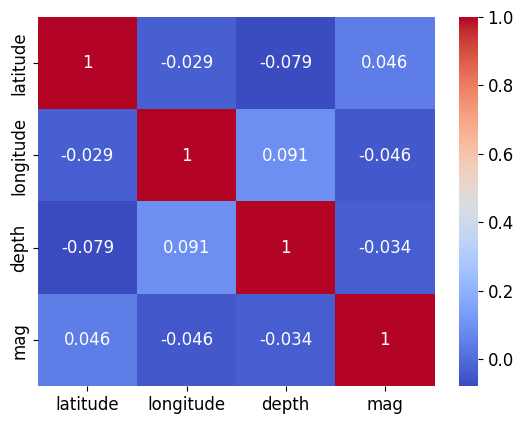

In [33]:
# plot the heatmap to analyse the correlation between all the numerical variables
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

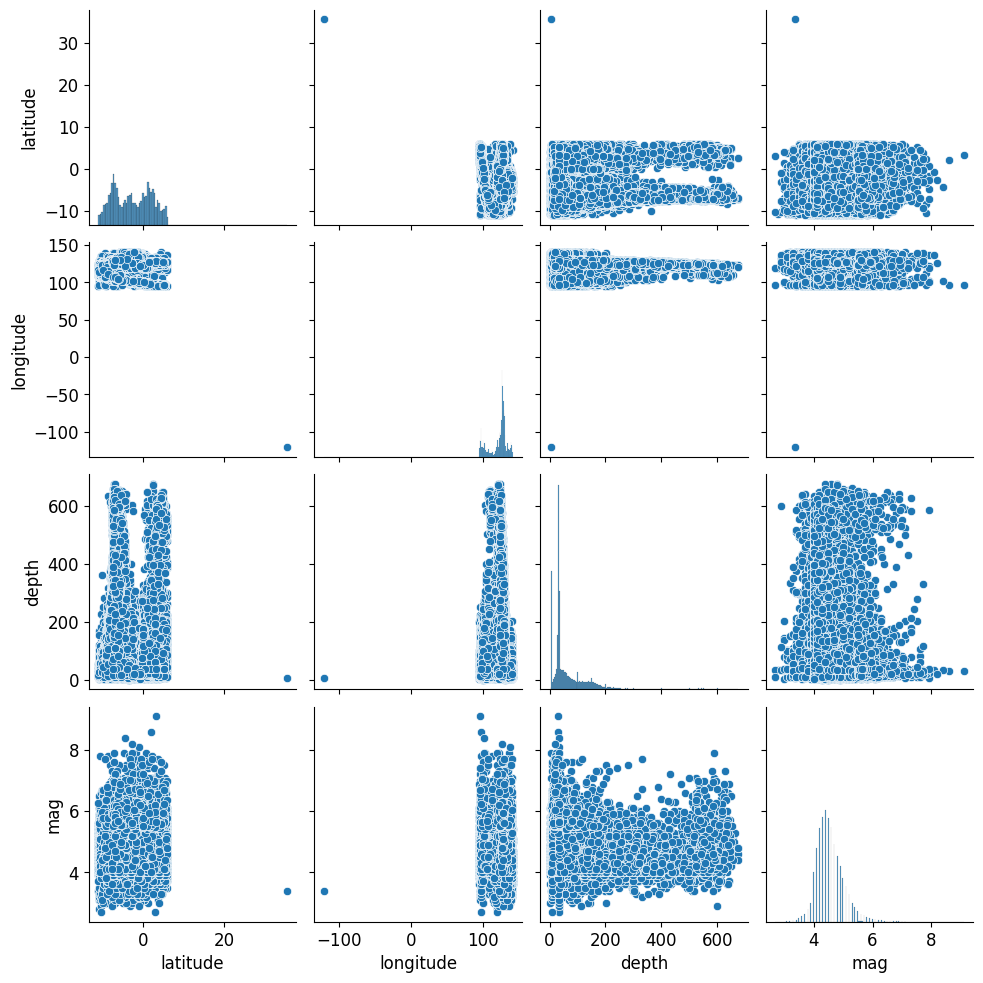

In [34]:
# Looking at relations between the numerical variables
sns.pairplot(data_gempa)

#**Statistical Description**

In [38]:
# Total earthquake events
df = data_gempa
N_tot = df['latitude'].count()
print('Total earthquake events', N_tot)
print('Average number of events per week:', round(N_tot/(52*(2016-1966+1)),2) )
print('Average number of events per year:', round(N_tot/((2016-1966+1)),2) )

# List of largest earthquake events
print('The magnitude of the largest earthquake:')
df[['mag','time']].sort_values('mag',ascending=False).head(5)

Total earthquake events 68783
Average number of events per week: 25.94
Average number of events per year: 1348.69
The magnitude of the largest earthquake:


,mag,time
17261,9.10,00:58:53
16766,8.60,16:09:36
45277,8.40,11:10:26
68752,8.20,00:11:17
30242,8.09,05:59:30


In [39]:
print('Magnitude Maximum:', df['mag'].max())
print('Magnitude Minium:', df['mag'].min())
print('Magnitude Rata-Rata:', df['mag'].mean())

Magnitude Maximum: 9.1
Magnitude Minium: 2.7
Magnitude Rata-Rata: 4.571682101682102


In [53]:
# Concatenate the datasets
merged_dff = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

# Mengambil hanya kolom yang diinginkan
selected_columns = ['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'net', 'id', 'updated', 'type', 'status', 'locationSource', 'magSource']
df_selected_columns = merged_dff[selected_columns]

# Menampilkan DataFrame yang hanya berisi kolom yang dipilih
df = df_selected_columns
df.head(10)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,1994-12-31T11:05:59.870Z,2.475,126.188,86.8,5.2,mb,us,usp0006qnv,2014-11-07T00:57:00.923Z,earthquake,reviewed,us,us
1,1994-12-30T21:28:48.450Z,-5.092,103.514,99.0,5.1,mb,us,usp0006qn6,2014-11-07T00:57:00.847Z,earthquake,reviewed,us,us
2,1994-12-30T03:46:35.310Z,-9.697,124.116,78.5,4.8,mb,us,usp0006qm6,2014-11-07T00:57:00.717Z,earthquake,reviewed,us,us
3,1994-12-29T06:15:10.280Z,-8.608,119.387,142.2,4.2,mb,us,usp0006qk6,2014-11-07T00:57:00.590Z,earthquake,reviewed,us,us
4,1994-12-29T04:33:53.090Z,-5.112,102.689,60.7,5.4,mb,us,usp0006qk3,2022-04-28T17:19:32.470Z,earthquake,reviewed,us,us
5,1994-12-28T22:39:23.700Z,5.211,126.316,72.5,5.0,mb,us,usp0006qjn,2014-11-07T00:57:00.531Z,earthquake,reviewed,us,us
6,1994-12-28T15:01:47.950Z,-10.585,121.723,70.9,5.1,mb,us,usp0006qhk,2014-11-07T00:57:00.275Z,earthquake,reviewed,us,us
7,1994-12-28T03:15:16.900Z,3.745,128.215,33.0,4.9,mb,us,usp0006qgx,2014-11-07T00:57:00.141Z,earthquake,reviewed,us,us
8,1994-12-27T21:59:50.500Z,4.295,125.924,182.0,4.9,mb,us,usp0006qgt,2014-11-07T00:57:00.133Z,earthquake,reviewed,us,us
9,1994-12-27T16:43:03.220Z,0.772,127.232,176.0,4.5,mb,us,usp0006qgg,2014-11-07T00:57:00.026Z,earthquake,reviewed,us,us


In [54]:
from datetime import datetime

# Mengonversi kolom 'time' menjadi tipe datetime
df['time'] = pd.to_datetime(df['time'])

# Menerapkan filter untuk tahun 1966 - 2016
df_filtered = df[(df['time'].dt.year >= 1966) & (df['time'].dt.year <= 2016)]

# Menampilkan DataFrame yang telah difilter
df = df_filtered
df.head(10)

#Object Date Time
df['dt_time'] = pd.to_datetime(df['time'])

# Column year, month, and day
df['dofy'] = df['dt_time'].dt.strftime("%j").astype(int)
df['year'] = df['dt_time'].dt.year
df['month'] = df['dt_time'].dt.month
df['day'] = df['dt_time'].dt.day

# Calculate the number of earthquake events per time (DMY)
dofy_tot = df['dofy'].value_counts(sort=True)
dofy_tot.sort_index(axis=0, inplace=True)

year_tot = df['year'].value_counts(sort=True)
month_tot = df['month'].value_counts(sort=True)
day_tot = df['day'].value_counts(sort=True)

# Calculate the number of earthquake events per time (DMY)
year_ave = year_tot.mean()
dofy_ave = dofy_tot.mean()
month_ave = month_tot.mean()


<ipython-input-54-55a519a534f2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
<ipython-input-54-55a519a534f2>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt_time'] = pd.to_datetime(df['time'])
<ipython-input-54-55a519a534f2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

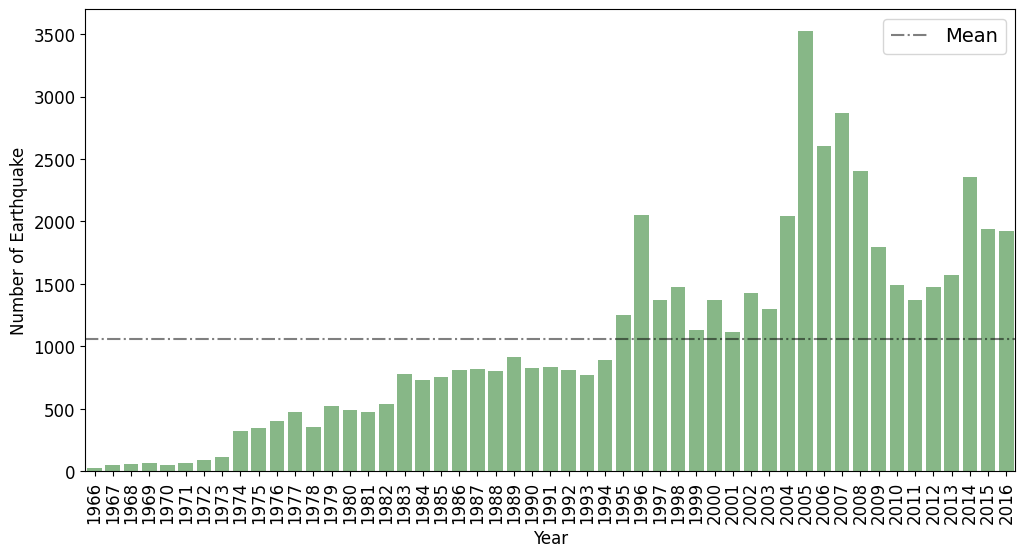

In [55]:
# Plot Bar Chart
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 14

plt.figure(figsize=(12,6))

sns.barplot(x=year_tot.index, y=year_tot.values, alpha=0.5, color='green')
plt.axhline(y=year_ave, color='k', linestyle='-.',
            alpha=0.5, label='Mean')
plt.xlabel('Year'), plt.ylabel('Number of Earthquake')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()


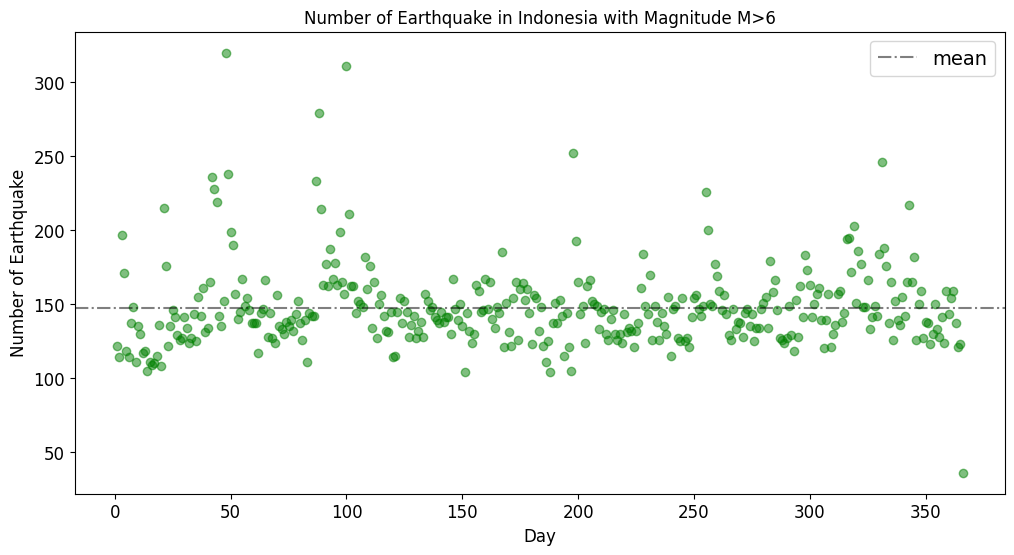

In [56]:
plt.figure(figsize=(12,6))

plt.plot(dofy_tot.index, dofy_tot.values ,'go', alpha=0.5)
plt.axhline(y=dofy_ave, color='k',linestyle='-.',alpha=0.5,label='mean')
plt.ylabel('Number of Earthquake'), plt.xlabel('Day')
plt.title('Number of Earthquake in Indonesia with Magnitude M>6')
plt.legend()
plt.show()

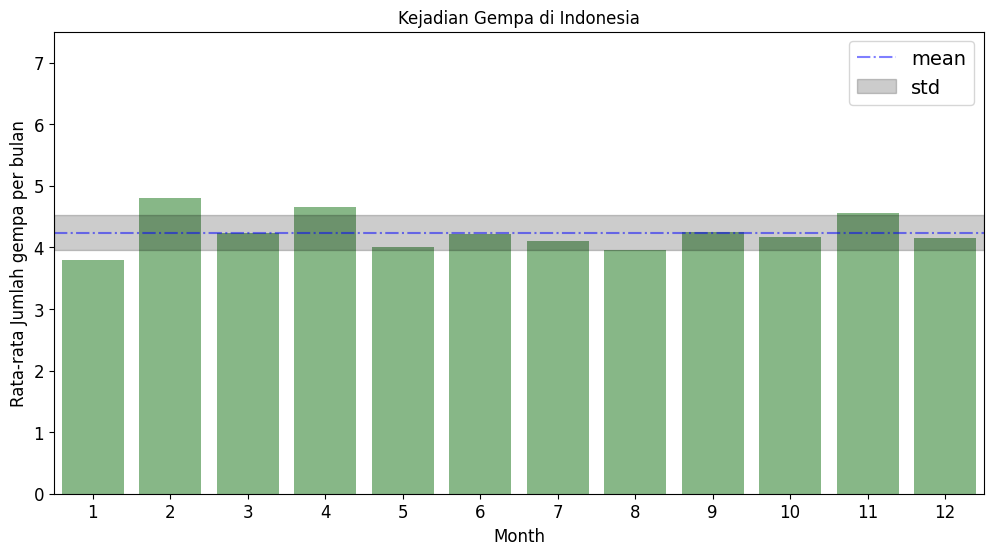

In [57]:
# Array of month lengths
month_length = np.array([31,28,31,30,31,30,31,31,30,31,30,31])
# Sort by month index
month_sort = month_tot.sort_index()
# Normalize by the length of the month
month_norm = month_sort.values / (month_length*(2017-1983+1))

# Plot (including daily average and the deviation)
plt.figure(figsize=(12,6))

ax = sns.barplot(x=month_sort.index, y=month_norm, alpha=0.5, color='green')
ax.set_ylim([0, 7.5])
plt.axhline(y=np.mean(month_norm), color='b', linestyle='-.',
            alpha=0.5, label='mean')
plt.axhspan(np.mean(month_norm)-np.std(month_norm),
            np.mean(month_norm)+np.std(month_norm),
            color='k', alpha=0.2, label='std')
plt.ylabel('Rata-rata Jumlah gempa per bulan'), plt.xlabel('Month')
plt.title('Kejadian Gempa di Indonesia')
plt.legend()
plt.show()

#**Earthquake Location Visualization**

In [58]:
import folium
import pandas as pd

# Baca dataset ke dalam DataFrame
df = df

# Buat peta dengan lokasi tengah Indonesia sebagai pusat
m = folium.Map(location=[-2.4833826, 117.8902853], zoom_start=5)

# Tentukan rentang magnitudo dan warna yang sesuai
magnitude_ranges = [(5, 6, 'blue', 'Magnitude 5-6'),
                   (6.1, 7, 'green', 'Magnitude 6.1-7'),
                   (7.1, 8, 'orange', 'Magnitude 7.1-8'),
                   (8.1, 9, 'red', 'Magnitude 8.1-9')]

# Tambahkan marker untuk setiap gempa bumi pada peta dengan legend
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    for index, row in mag_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,  # Ukuran marker
            color=color,  # Warna marker
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Mag: {row['mag']}, Depth: {row['depth']} km"  # Informasi dalam popup
        ).add_to(m)

# Tambahkan legend ke peta
legend_html = """
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 120px;
                 background-color: white; opacity: 0.7; z-index:9999; font-size:12px;">
     <p><b>Legenda</b></p>
     <p><i class="fa fa-circle" style="color:blue"></i>Magnitude: 5-6</p>
     <p><i class="fa fa-circle" style="color:green"></i>Magnitude: 6.1-7</p>
     <p><i class="fa fa-circle" style="color:orange"></i>Magnitude: 7.1-8</p>
     <p><i class="fa fa-circle" style="color:red"></i>Magnitude: 8.1-9</p>
      </div>
     """

m.get_root().html.add_child(folium.Element(legend_html))

# Menyimpan peta ke file HTML
m.save("earthquake_map.html")

# Tampilkan peta di dalam notebook
m


Output hidden; open in https://colab.research.google.com to view.

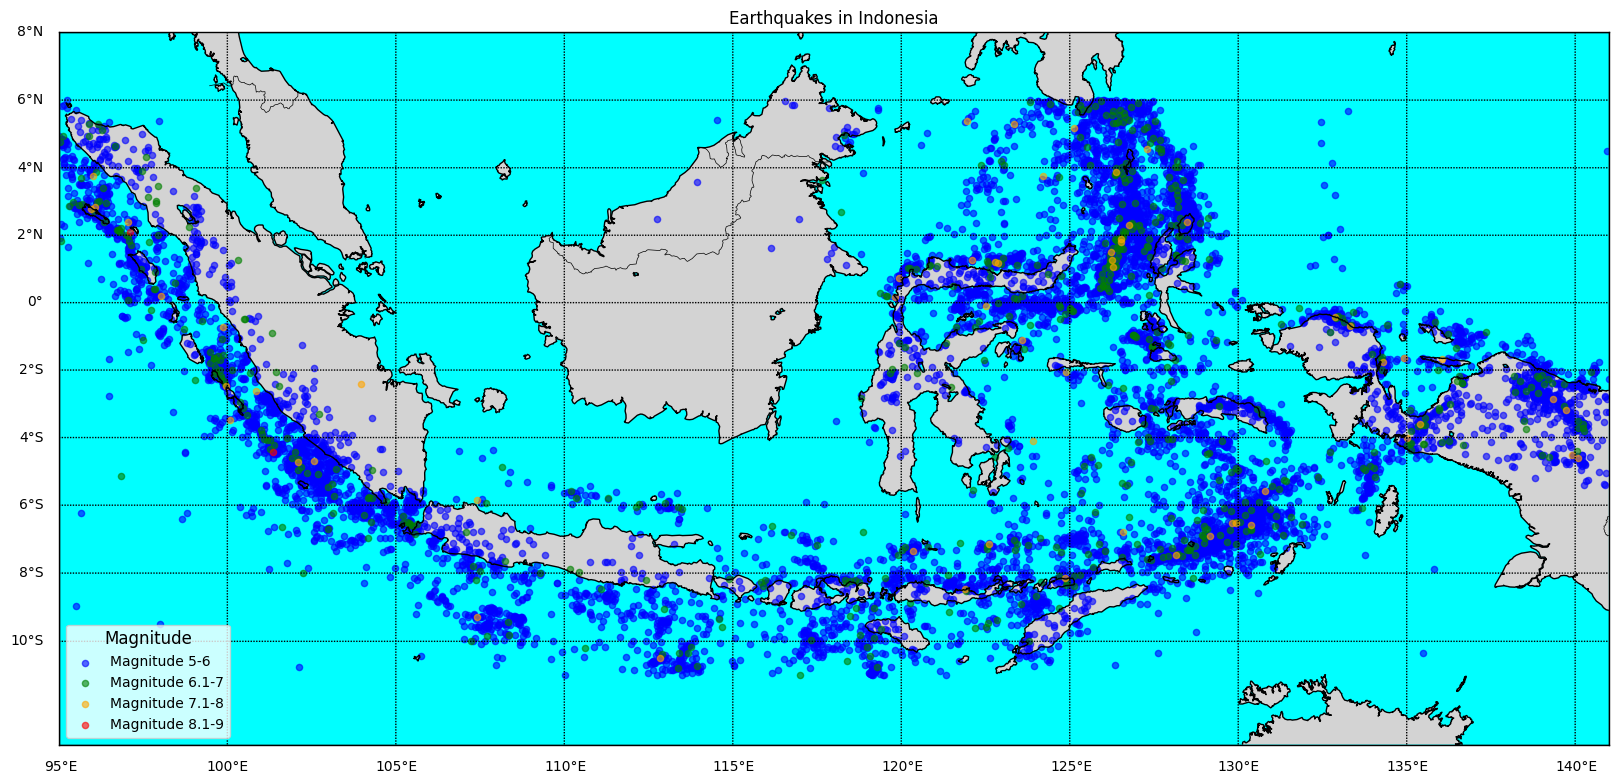

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Assume df is the DataFrame already loaded with earthquake data
# Example of how the DataFrame might be loaded:
# df = pd.read_csv('path_to_your_data.csv')

# Create a figure
fig, ax = plt.subplots(figsize=(20, 15))

# Create a Basemap instance
m = Basemap(projection='merc',
            llcrnrlat=-13, urcrnrlat=8,
            llcrnrlon=95, urcrnrlon=141,
            resolution='i', ax=ax)

# Draw coastlines, countries, and fill continents
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgray', lake_color='aqua')

# Draw map boundary and meridians/parallels
m.drawmapboundary(fill_color='aqua')
m.drawparallels(range(-10, 11, 2), labels=[1,0,0,0], fontsize=10)  # Adjusted parallels to match the new latitude range
m.drawmeridians(range(95, 142, 5), labels=[0,0,0,1], fontsize=10)

# Define magnitude ranges and corresponding colors
magnitude_ranges = [(5, 6, 'blue', 'Magnitude 5-6'),
                    (6.1, 7, 'green', 'Magnitude 6.1-7'),
                    (7.1, 8, 'orange', 'Magnitude 7.1-8'),
                    (8.1, 9, 'red', 'Magnitude 8.1-9')]

# Plot earthquake data points
for min_mag, max_mag, color, label in magnitude_ranges:
    mag_data = df[(df['mag'] >= min_mag) & (df['mag'] <= max_mag)]
    x, y = m(mag_data['longitude'].values, mag_data['latitude'].values)
    m.scatter(x, y, s=20, color=color, label=label, alpha=0.6)

# Add a legend
plt.legend(loc='lower left', fontsize=10, title='Magnitude')

# Add a title
plt.title('Earthquakes in Indonesia')

# Save the plot as an image
plt.savefig('earthquake_map.png', bbox_inches='tight')

# Show the plot
plt.show()


#**Frequency**

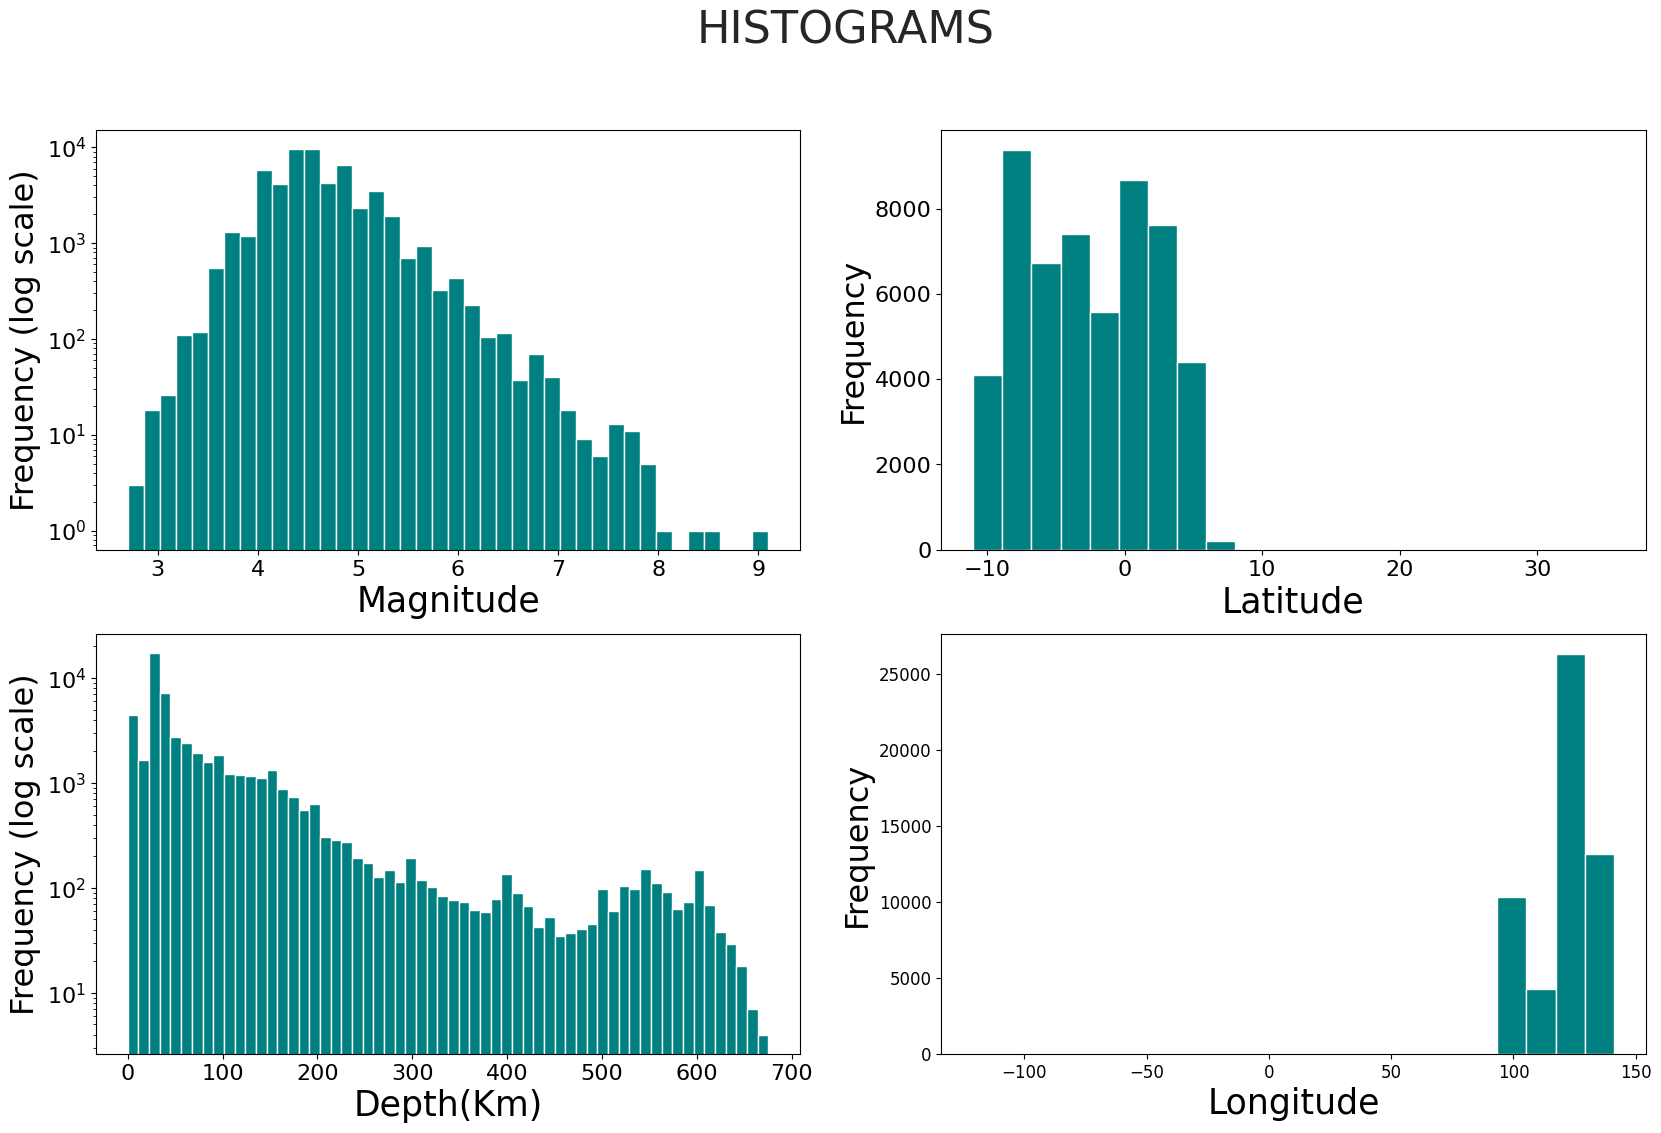

In [67]:
#fig=plt.figure()
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('HISTOGRAMS',fontsize=32)
# Draw a nested boxplot
axes[0][0].hist(df['mag'],bins=40,color='teal')
axes[1][0].hist(df['depth'],bins=60,color='teal')
axes[0][1].hist(df['latitude'],bins=22,color='teal')
axes[1][1].hist(df['longitude'],bins=22,color='teal')
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            title = ax.set_xlabel("Magnitude",fontsize=25) #set font and title of x label
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23) #set font and title of y label
            ax.set_yscale('log') #set log scale
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            title = ax.set_xlabel("Depth(Km)",fontsize=25)
            title2 = ax.set_ylabel("Frequency (log scale)",fontsize=23)
            ax.set_yscale('log')
            ax.tick_params(labelsize=16)
        elif i == 0 and j==1:
            title = ax.set_xlabel("Latitude",fontsize=25  )
            title2 = ax.set_ylabel("Frequency",fontsize=23)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            title = ax.set_xlabel("Longitude", fontsize=25 )
            title2 = ax.set_ylabel("Frequency",fontsize=23)


##**Depth, Longitude**

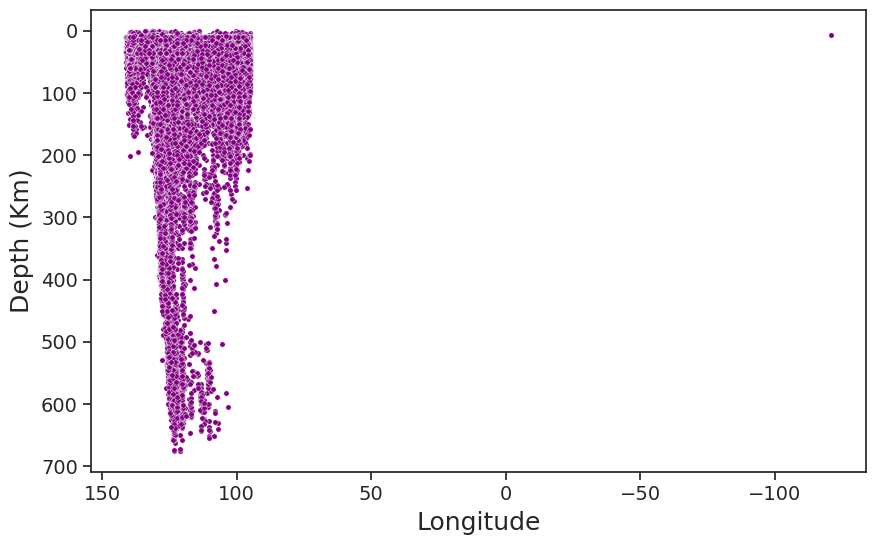

In [68]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['longitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Longitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

## **Depth, Latitude**

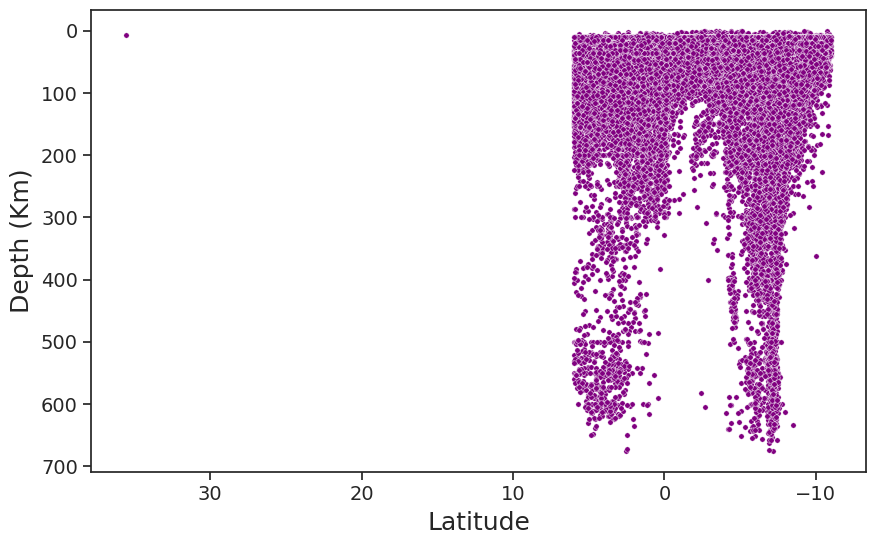

In [69]:
fig,axes=plt.subplots(1,1,figsize=(10,6))
sns.scatterplot(x=df['latitude'],y=df['depth'],s=15,color='purple')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.xlabel("Latitude",fontsize=18,labelpad=5) #set font and title of x label
plt.ylabel('Depth (Km)',fontsize=18,labelpad=5) #set font and title of y label
#plt.yscale('log')
plt.tick_params(labelsize=14) #change labelsize

#**Break Location into Grid 1x1 (degree)**

In [70]:
# Determining geographic boundaries based on earthquake data
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

# Print the latitude and longitude range
print("Range Latitude:", min_lat, "until", max_lat)
print("Range Longitude:", min_lon, "until", max_lon)

Range Latitude: -11.0 until 35.5446667
Range Longitude: -120.8448333 until 140.999
